# Introduction to proximal methods 

## Gradient descent as forward Euler scheme

Consider the following ODE
$$
\frac{dx}{dt} = -f'(x(t))
$$
and after discretization

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$

where $\alpha = t_{k+1} - t_k$ is a grid step and $x_k \equiv x(t_k)$

From this follows 

$$
x_{k+1} = x_k - \alpha f'(x_k),
$$

which is equivalent to gradient descent method

### Properties of forward Euler scheme

- Easy to use
- Can be unstable if $\alpha$ is too large, which is natural drawback of gradient descent with large step size
- Stability issue can be solved with **backward Euler scheme**

## Proximal method as backward Euler scheme

$$
\frac{dx}{dt} = -f'(x(t))
$$

and after discretization in backward manner

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'({\color{red}{x_{k+1}}}),
$$

After some re-arrangements
\begin{align*}
& \left(\frac{1}{2\alpha} \|u - x_k\|_2^2 + f(u) \right)'(x_{k+1}) = 0 \\
& x_{k+1} = \arg\min_u \left(f(u) + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) = prox_{\alpha f}(x_k)
\end{align*}



### Example: iterative refinement

The method to solve positive semi-definite linear system given Cholesky factorization of $A + \epsilon I$ for some $\epsilon$
$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$
where $A \in \mathbb{S}^n_+$

\begin{align*}
prox_{\alpha f} (x_k) & = \arg\min_u \left(\frac{1}{2}u^{\top}Au - b^{\top}u + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) \\
& = \left(A + (1/ \alpha) I\right)^{-1}\left(b + (1 / \alpha)x_k\right) \\
& = x_k + (A + \epsilon I)^{-1}(b - Ax_k)
\end{align*}


### Properties of proximal map 
$$
x_{k+1} = prox_{f}(x_k)
$$

1. Fixed point of proximal operator is equal to minimizer of $f$

$$
x^* = prox_f(x^*)
$$ 

Proximal map is not a contraction

There exists theory on firm non-expansiveness of proximal operator

2. Resolvent of operator

$$
prox_{\alpha f}(x) = (I + \alpha f')^{-1}(x)
$$

This property can be extended to subdifferential.

### Modified gradient step interpretation

Assume $f$ is twice differentiable and strong convex ($f''(x) \succ 0$).

1. Gradient method as approximation of proximal method

$$
x_{k+1} = prox_{\alpha f} (x_k) = (I + \alpha f')^{-1}(x_k) \approx x_k - \alpha f'(x_k) + o(\alpha), \; \alpha \to 0  
$$

2. Proximal method for second-order approximation $\hat{f}(v) = f(x) + \langle f'(x), v - x \rangle + \frac{1}{2}\langle v - x, f''(x) (v - x) \rangle$

$$
prox_{\alpha \hat{f}}(x_k) = x_k - (f''(x_k) + (1 / \alpha)I)^{-1}f'(x_k) 
$$

### Separable sum

If $f$ has the form

$$
f(x) = \sum_{i=1}^n f_i(x_i)
$$

then 
$$
prox_f(v)_i = prox_{f_i}(v_i)
$$

- High parallelization of the proximal operator computing 
- **Consensus form** of the problem
$$
\min \sum_{i=1}^n f_i(x) \to \min \sum_{i=1}^n f_i(x_i), \; \text{s.t. } x_1 = \ldots = x_n
$$

## Proximal gradient method (PGM)

Consider convex function $f$ such that

$$
f(x) = h(x) + g(x),
$$

where $h(x)$ is convex differentiable, and $g(x)$ can be convex extended-value function, so $g: \mathbb{R}^n \to \mathbb{R} \cup \{+\infty\}$

Then the one step of the proximal gradient method is

$$
x_{k+1} = prox_{\alpha_k g} (x_k - \alpha_k h'(x_k))
$$

- Convergence rate $\mathcal{O}(1/k)$ for step size $\alpha_k \equiv \alpha \in (0, 1/L]$, where $L$ is Lipschitz constant of $f'$
- Backtracking procedure is available for adaptive search of $\alpha_k$

### Pacticular cases of PGM

- If $g(x)$ is an indicator function of some convex sets $G$
$$
g(x) = \begin{cases} 0 & x \in G \\ +\infty & x \not\in G   \end{cases}
$$

PGM is projected gradient method since

$$
prox_{g} (y) = \arg\min_{u \in G} (\| y - u\|^2_2) \equiv \pi_G(y)
$$

- If $h \equiv 0$, then PGM is simple proximal method
- If $g \equiv 0$, then PGM is vanilla gradient descent method 

### Fixed point iteration interpretation

From the first-order optimality condition follows

\begin{align*}
& 0 \in \alpha h'(x^*) + \alpha\partial g(x^*)\\
& 0 \in \alpha h'(x^*) + x^* - x^* + \alpha\partial g(x^*)\\
& (I - \alpha h')(x^*) \in (I + \alpha \partial g)(x^*)\\
& x^* = (I + \alpha \partial g)^{-1}(I - \alpha h')(x^*)\\
& x^* = prox_{\alpha g}(x^* - \alpha h'(x^*))
\end{align*}

## Accelerated proximal gradient method

\begin{align*}
& y_{k+1} = x_k + w_k (x_k - x_{k+1})\\
& x_{k+1} = prox_{\alpha_k g} (y_{k+1} - \alpha_k h'(y_{k+1}))
\end{align*}

- $\{w_k\}$ is special sequence that has to be chosen to accelerate convergence, for example $w_k = \frac{k}{k+3}$
- Similar backtracking procedure is helpful for adaptive search $\alpha_k$
- Convergence rate $\mathcal{O}(1/k^2)$ which is tight lower bound for convex function

## Examples

- Lasso
- Matrix decomposition

### Lasso

$$
\min_x \frac{1}{2}\|Ax - y \|^2_2 + \gamma \|x\|_1
$$

- $h(x) = \frac{1}{2}\|Ax - y \|^2_2$
- $g(x) = \gamma \|x\|_1$

####  Soft thresholding

- $\|x\|_1 = |x_1| + \ldots + |x_n|$
- Separable sum
- $prox_{\alpha \|x\|_1} (x)_i = prox_{\alpha |\cdot|}(x_i)$
- $prox_{\alpha |\cdot|} (x_i) = \arg\min_u (|u| + 1/(2\alpha)\|x_i - u\|^2_2)$
- Analytical solution
$$ 
prox_{\alpha |\cdot|} (x_i) = \begin{cases} x_i - \alpha & x_i \geq \alpha  \\ 0 & |x_i| \leq \alpha \\ x_i + \alpha & x_i \leq -\alpha \end{cases}
$$
- Vectorized form
$$
prox_{\alpha \|x\|_1} (x) = \text{sign}(x)(|x| - \alpha)_+, \; |x| = (|x_1|, \ldots, |x_n|)
$$

####  (F)ISTA

- Proximal gradient method for Lasso problem is known as ISTA (Iterative shrinkage-thresholding algorithm)
- Fast proximal gradient is known as FISTA (Fast ISTA)

### Experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
import cvxpy as cvx

In [2]:
def prox_alg(f, f_grad, g_prox, x0, num_iter, beta=0.5, fix_lam=None, accel=False):
    conv = [x0]
    x = x0.copy()
    if accel:
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
    if fix_lam is None:
        lam = 1.
    for i in range(num_iter):
        if accel and i > 0:
            x = x + (t_prev - 1) / t_next * (x - conv[-2])
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        if fix_lam is None:
            while True:
                z = g_prox(x - lam * f_grad(x), lam)
                if f(z) <= f(x) + f_grad(x).dot(z - x) + np.linalg.norm(z - x)**2 / (2 * lam):
                    break
                else:
                    lam = lam * beta
        else:
            z = g_prox(x - fix_lam * f_grad(x), fix_lam)
        x = z.copy()
        conv.append(x)
    return x, conv

In [3]:
f = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
f_grad = lambda x: A.T.dot(A.dot(x) - y)
def g_prox(h, lam):
    return np.sign(h) * np.maximum(np.abs(h) - lam * gamma, 0) 

In [4]:
import sklearn.preprocessing as skprep
m = 500
n = 2500
A = np.random.rand(m, n)
A = skprep.normalize(A, norm="l2", axis=0)
L = np.linalg.eigvalsh(A.T.dot(A)).max()
x_true = np.random.randn(n)
x_true[np.random.rand(n) < 0.96] = 0
print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))
v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v
gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
gamma = 0.1 * gamma_max
print("Gamma = {}".format(gamma))
print("S2N ratio = {}".format(np.linalg.norm(A.dot(x_true))**2 / np.linalg.norm(v)**2))
f_star = f(x_true) + gamma*np.linalg.norm(x_true, 1)

Number of nonzeros in x_true = 107
Gamma = 0.6971017991307512
S2N ratio = 19.927481329695098


In [5]:
x_c = cvx.Variable(n)
lambd = cvx.Parameter(sign="Positive")
lambd.value = gamma
problem = cvx.Problem(cvx.Minimize(lambd * cvx.norm1(x_c) + 0.5 * cvx.sum_squares(A * x_c - y)))
problem.solve(solver="SCS", verbose=False, eps=1e-5)
x_cvx = np.array(x_c.value).ravel()
print("CVXPy optimal value = {}".format(problem.value))

CVXPy optimal value = 15.816358241132487


In [6]:
num_iter = 500
# x0 = np.zeros(n)
x0 = np.random.rand(n)

In [7]:
x, conv = prox_alg(f, f_grad, g_prox, x0, num_iter, fix_lam=None)
print("Number nonzeros in x* = {}".format(np.sum(x != 0)))
print("f* = {}".format(f(x) + gamma * np.linalg.norm(x, 1)))
x_acc, conv_acc = prox_alg(f, f_grad, g_prox, x0, num_iter, fix_lam=None, accel=True)
print("Number nonzeros in x* = {}".format(np.sum(x_acc != 0)))
print("f* = {}".format(f(x_acc) + gamma * np.linalg.norm(x_acc, 1)))

Number nonzeros in x* = 1636
f* = 189.82822611975368
Number nonzeros in x* = 18
f* = 15.82674090197427


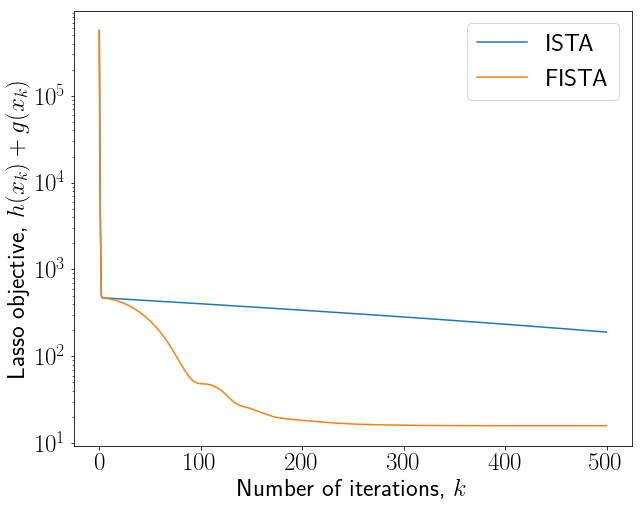

In [8]:
plt.figure(figsize=(10, 8))
fontsize=25
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv], label="ISTA")
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv_acc], label="FISTA")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"Lasso objective, $h(x_k) + g(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

### Matrix decomposition

\begin{align*}
& \min \phi_1(X_1) + \gamma_2 \phi_2(X_2) + \ldots + \gamma_N \phi_N(X_N) \\
\text{s.t. } & X_1 + \ldots + X_N = A
\end{align*}

- Decompose matrix in the sum of well-structured matrices
- [Robust PCA](https://statweb.stanford.edu/~candes/papers/RobustPCA.pdf): $A = L + S$, where 
    - $L$ is low-rank
    - $S$ is sparse
    
Good presentation about robust PCA is [here](http://www.princeton.edu/~yc5/ele538b_sparsity/lectures/robust_PCA.pdf)

### Some penalties and structures being induced by them

- Squared Frobenius norm gives small entries of $X$
$$
\phi(X) = \sum_{i,j} X^2_{ij}
$$
- Entrywise $\ell_1$ norm leads to sparsity of $X$
$$
\phi(X) = \sum_{i,j} |X_{ij}|
$$
- Nuclear norm gives low-rank matrix $X$ 
$$
\phi(X) = \|X\|_* = \sum_{i=1}^n \sigma_i(X)
$$

In [9]:
import copy

def prox_alg_mat(f, f_grad, g_prox, X0, num_iter, beta=0.5, fix_lam=None, accel=False):
    conv = [X0]
    X = copy.copy(X0)
    if accel:
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
    if fix_lam is None:
        lam = 1.
    Z = [[] for X in X0]
    for i in range(num_iter):
        if accel and i > 0:
            for i in range(len(X)):
                X[i] = X[i] + (t_prev - 1) / t_next * (X[i] - conv[-2][i])
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        if fix_lam is None:
            current_f = f(X)
            current_grad = []
            for grad in f_grad:
                current_grad.append(grad(X))
            while True:
                for i, g in enumerate(g_prox):
                    Z[i] = g(X[i] - lam * current_grad[i], lam)
                lin_term = 0
                for i in range(len(Z)):
                    lin_term += np.trace(current_grad[i].T.dot(Z[i] - X[i]))
                quad_term = 0
                for i in range(len(Z)):
                    quad_term += np.linalg.norm(Z[i] - X[i])**2
                if f(Z) <= current_f + lin_term + quad_term / (2 * lam):
                    break
                else:
                    lam = lam * beta
        else:
            for i, g in enumerate(g_prox):
                Z[i] = g(X[i] - fix_lam * f_grad[i](X), fix_lam)
        X = copy.copy(Z)
        conv.append(X)
    return X, conv

In [10]:
m = 100
n = 100
rank = 4
L = np.random.randn(m, rank).dot(np.random.randn(rank, n))
S = 20 * np.random.rand(m * n) - 10
S[np.random.rand(m*n) < 0.9] = 0
print(np.sum(S != 0))
S = S.reshape(m, n)
V = 0.05 * np.random.randn(m, n)
A = L + S + V
max_gamma_3 = np.linalg.norm(A, ord="nuc")
gamma_3 = 0.015 * max_gamma_3
print(gamma_3)
max_gamma_2 = np.max(np.abs(A))
gamma_2 = 0.15 * max_gamma_2
print(gamma_2)

996
28.03666185672142
2.3361277778917726


In [11]:
L_c = cvx.Variable(m, n)
S_c = cvx.Variable(m, n)
problem = cvx.Problem(cvx.Minimize(0.5 * cvx.sum_squares(A  - (L_c + S_c)) + gamma_2 * cvx.norm(S_c, 1) + 
                                  gamma_3 * cvx.norm(L_c, "nuc")))
problem.solve(solver="SCS", verbose=True, eps=1e-5, max_iters=3000, use_indirect=True)
L_cvx = np.array(L_c.value)
S_cvx = np.array(S_c.value)
print("CVXPy optimal value = {}".format(problem.value))
print("Rank of lowrank term = {}".format(np.linalg.matrix_rank(L_cvx)))

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 139902, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 3000, normalize = 1, scale = 1.00
Variables n = 70001, constraints m = 80002
Cones:	primal zero / dual free vars: 29900
	linear vars: 20000
	soc vars: 10002, soc blks: 1
	sd vars: 20100, sd blks: 1
Setup time: 1.26e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  3.94e-02 
   100| 5.52e-03  1.13e-02  1.38e-02  1.84e+04  1.89e+04  6.33e-12  1.84e+00 
   200| 5.56e-04  1.15e-03  1.40e-03

In [38]:
def f(X):
    Y = np.zeros_like(X[0])
    for y in X:
        Y = Y + y
    return np.linalg.norm(A - Y, ord="fro")**2 * 0.5

def grad_f_L(X):
    return X[0] + X[1] - A

def grad_f_S(X):
    return X[0] + X[1] - A

f_grad = [grad_f_S, grad_f_L]

def entry_l1_prox(X, lam):
    return np.sign(X) * np.maximum(np.abs(X) - gamma_2 * lam, 0) 

def nuclear_norm_prox(X, lam):
    U, sigma, V = np.linalg.svd(X, full_matrices=False)
    return U.dot(np.diag(np.maximum(sigma - lam * gamma_3, 0))).dot(V)

g_prox = [entry_l1_prox, nuclear_norm_prox]

In [13]:
# X0 = [np.random.randn(m, n), np.random.randn(m, n)]
X0 = [np.zeros((m, n)), np.zeros((m, n))]
num_iter = 600

In [14]:
step = 5e-3
X_pm, conv = prox_alg_mat(f, f_grad, g_prox, X0, num_iter, beta=0.5, fix_lam=step, accel=False)
print("f* = {}".format(f(X_pm) + gamma_2 * np.sum(np.abs(X_pm[0])) + gamma_3 * np.linalg.norm(X_pm[1], "nuc")))
print("Rank of the low-rank term = {}".format(np.linalg.matrix_rank(X_pm[1])))
print("Number of nnz in sparse term = {}".format(np.sum(X_pm[0] != 0)))
X_pm_acc, conv_acc = prox_alg_mat(f, f_grad, g_prox, X0, num_iter, beta=0.5, fix_lam=step, accel=True)
print("f* = {}".format(f(X_pm_acc) + gamma_2 * np.sum(np.abs(X_pm_acc[0])) + 
                       gamma_3 * np.linalg.norm(X_pm_acc[1], "nuc")))
print("Rank of the low-rank term = {}".format(np.linalg.matrix_rank(X_pm_acc[1])))
print("Number of nnz in sparse term = {}".format(np.sum(X_pm_acc[0] != 0)))

f* = 18983.824068362934
Rank of the low-rank term = 4
Number of nnz in sparse term = 988
f* = 18815.809099714676
Rank of the low-rank term = 4
Number of nnz in sparse term = 815


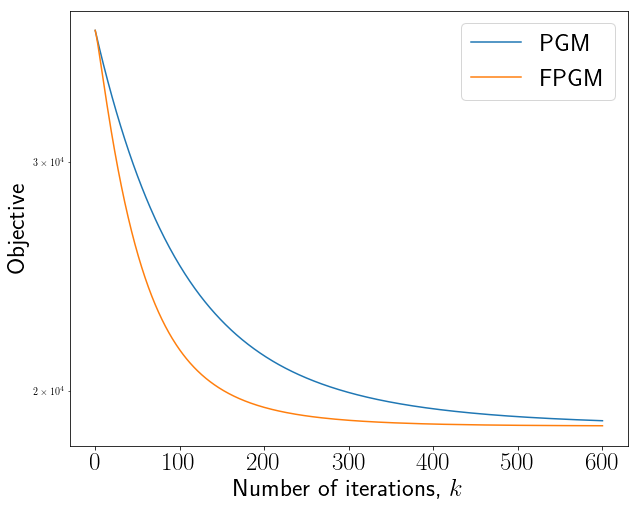

In [15]:
plt.figure(figsize=(10, 8))
fontsize=25
plt.plot([f(X) + gamma_2 * np.sum(np.abs(X[0])) + gamma_3 * np.linalg.norm(X[1], "nuc") for X in conv], label="PGM")
plt.plot([f(X) + gamma_2 * np.sum(np.abs(X[0])) + gamma_3 * np.linalg.norm(X[1], "nuc") for X in conv_acc], label="FPGM")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"Objective", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

### Application in video processing

(539, 810)
0.273873124617683
0.255


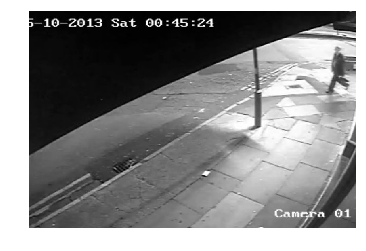

In [239]:
import imageio

A = imageio.imread("./cctv_frame.png")[:, :, 0]
plt.imshow(A, cmap="gray")
plt.axis("off")
print(A.shape)
max_gamma_3 = np.linalg.norm(A, ord="nuc")
gamma_3 = 0.000001 * max_gamma_3
print(gamma_3)
max_gamma_2 = np.max(np.abs(A))
gamma_2 = 0.001 * max_gamma_2
print(gamma_2)

In [240]:
X0 = [np.zeros_like(A), np.zeros_like(A)]
num_iter = 500

In [241]:
step = 1e-2
X_pm, conv = prox_alg_mat(f, f_grad, g_prox, X0, num_iter, beta=0.5, fix_lam=step, accel=False)
print("f* = {}".format(f(X_pm) + gamma_2 * np.sum(np.abs(X_pm[0])) + gamma_3 * np.linalg.norm(X_pm[1], "nuc")))
print("Rank of the low-rank term = {}".format(np.linalg.matrix_rank(X_pm[1])))
print("Number of nnz in sparse term = {}".format(np.sum(X_pm[0] != 0)))
X_pm_acc, conv_acc = prox_alg_mat(f, f_grad, g_prox, X0, num_iter, beta=0.5, fix_lam=step, accel=True)
print("f* = {}".format(f(X_pm_acc) + gamma_2 * np.sum(np.abs(X_pm_acc[0])) + 
                       gamma_3 * np.linalg.norm(X_pm_acc[1], "nuc")))
print("Rank of the low-rank term = {}".format(np.linalg.matrix_rank(X_pm_acc[1])))
print("Number of nnz in sparse term = {}".format(np.sum(X_pm_acc[0] != 0)))

f* = 5716501.283695547
Rank of the low-rank term = 538
Number of nnz in sparse term = 432919
f* = 5649034.6977425
Rank of the low-rank term = 525
Number of nnz in sparse term = 422743


Stop animation!


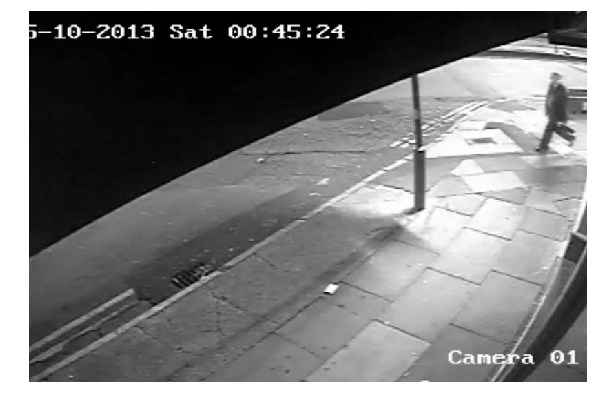

In [244]:
from IPython import display
i = 0
try:
    while True:
        if i >= len(conv):
            i = 0
        plt.figure(figsize=(10, 8))
        plt.imshow(conv_acc[i][0], cmap="gray")
        plt.axis("off")
        plt.show()
        display.clear_output(wait=True)
        i += 10
except KeyboardInterrupt:
    print("Stop animation!")
    plt.figure(figsize=(10, 8))
    plt.imshow(conv[-1][0], cmap="gray")
    plt.axis("off")

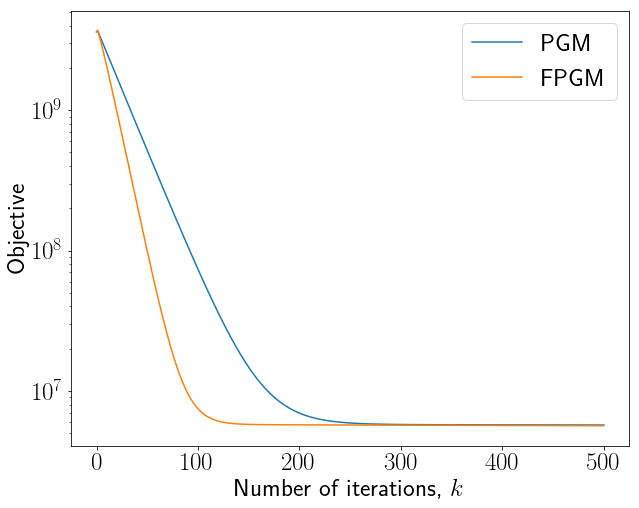

In [243]:
plt.figure(figsize=(10, 8))
fontsize=25
plt.plot([f(X) + gamma_2 * np.sum(np.abs(X[0])) + gamma_3 * np.linalg.norm(X[1], "nuc") for X in conv], label="PGM")
plt.plot([f(X) + gamma_2 * np.sum(np.abs(X[0])) + gamma_3 * np.linalg.norm(X[1], "nuc") for X in conv_acc], label="FPGM")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"Objective", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

##  Further directions

1. Non-euclidean distance used as penalty, i.e. Bregman divergence and Mirror descent method 
2. Non-convex optimization
3. Parallel implementations and distributed setting
4. Use different discretization methods from ODE-related science to get new fast optimization methods, see [this paper](https://arxiv.org/pdf/1805.00521.pdf)

## References

1. [Proximal algorithms](http://web.stanford.edu/~boyd/papers/pdf/prox_algs.pdf) and related [sources](http://web.stanford.edu/~boyd/papers/prox_algs.html) by N. Parikh and S. Boyd 
2. [Gradient-based algorithms with applications to signal recovery problems](http://www.math.tau.ac.il/~teboulle/papers/gradient_chapter.pdf) by A. Beck and M. Teboulle
3. [Proximal Backpropagation](https://arxiv.org/abs/1706.04638) by T Frerix et al (ICLR 2018)
4. [Stochastic Proximal Gradient Descent with Acceleration Techniques](https://papers.nips.cc/paper/5610-stochastic-proximal-gradient-descent-with-acceleration-techniques.pdf) by A. Nitanda (NIPS 2014)

## Summary

1. Proximal method
2. Proximal map and its property
3. Proximal gradient method and its acceleration
5. Applications